<a href="https://colab.research.google.com/github/natrask/ENM5320/blob/main/Code/PyTorchFDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor([-1.0176, -1.0093, -0.9843, -0.9432, -0.8867, -0.8155, -0.7310, -0.6345,
        -0.5275, -0.4119, -0.2895, -0.1624, -0.0326,  0.0977,  0.2264,  0.3514,
         0.4707,  0.5822,  0.6841,  0.7749,  0.8529,  0.9168,  0.9658,  0.9988,
         1.0155,  1.0155,  0.9988,  0.9658,  0.9168,  0.8529,  0.7749,  0.6841,
         0.5822,  0.4707,  0.3514,  0.2264,  0.0977, -0.0326, -0.1624, -0.2895,
        -0.4119, -0.5275, -0.6345, -0.7310, -0.8155, -0.8867, -0.9432, -0.9843,
        -1.0093, -1.0176], dtype=torch.float64)


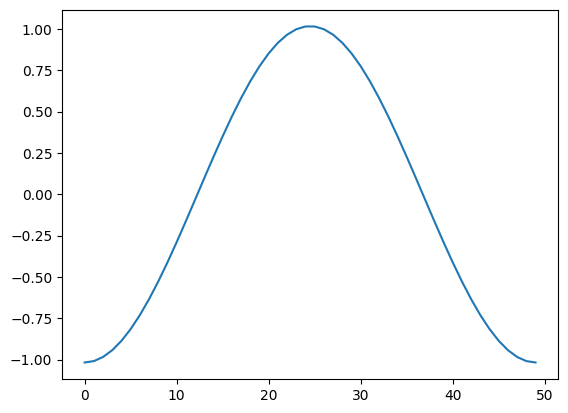

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the model (in our case, its y = A*x + b)
class FiniteDifferenceOperator(nn.Module):
    def __init__(self,Nleft,Nright):
        super(FiniteDifferenceOperator, self).__init__()
        # Define a simple MLP with two hidden layer
        self.Nstencil = Nleft + Nright + 1
        self.Nleft = Nleft
        self.Nright = Nright
        # self.stencil = torch.nn.Parameter(torch.randn(Nneurons))
        self.stencil = torch.from_numpy((0.5/dx)*np.array([1,0,-1]))


    def forward(self, x):

        N_nodes = x.shape[0]
        f_out = torch.zeros_like(x)
        for i in range(N_nodes):
          for jj in range(self.Nstencil):
            j = jj - self.Nleft
            j_withbc = (i+j)%(N_nodes-1)
            f_out[i] += self.stencil[jj]*x[j_withbc]

        return f_out


# Parameters
L = 2.0*np.pi  # Length of the domain
T = np.pi   # Total time
nx = 50  # Number of spatial points
nt = 50  # Number of time steps

# Discretization
dx = L / nx
dt = T / nt
x = np.linspace(0, L, nx)
u = torch.from_numpy(np.sin(2 * np.pi * x / L))  # Initial condition
uexact = np.sin(2 * np.pi * (x-T) / L)  # Exact solution
Dx = FiniteDifferenceOperator(1,1) #finite difference stencil with one node on each side
print(Dx(u))
plt.plot(Dx(u).detach().numpy())
# for n in range(nt):
#     u_new = np.zeros_like(u)
#     for i in range(nx):
#         u_new[i] = u[i] + ( 0.5 * dt / dx) * (u[(i+1) % (nx-1)] - u[(i-1) % (nx-1)])
#     for i in range(nx):
#         u[i] = u_new[i]
#     if n % 10 == 0:
#       tn = n*dt
#       uexact = np.sin(-2 * np.pi * (x-tn) / L)
#       plt.plot(x, u,'--',label='Numerical')
#       plt.plot(x, uexact, label='Exact')
